In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow
!pip install lime
!pip install category_encoders

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin
from lime.lime_tabular import LimeTabularExplainer
import lime
import lime.lime_tabular
import shap
from sklearn.preprocessing import LabelEncoder

Dataset import


In [ ]:
Dataset_2=pd.read_csv('/content/mdataset2-Dataset2.csv')

In [ ]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7832 non-null   float64
 1   Gender         7840 non-null   object 
 2   Job_role       6600 non-null   object 
 3   Province       7831 non-null   object 
 4   Salary         7843 non-null   float64
 5   Is_married     7845 non-null   float64
 6   Genetics       7828 non-null   float64
 7   Weight         7861 non-null   float64
 8   Height         7843 non-null   float64
 9   Shampoo_brand  7858 non-null   object 
 10  Smoking        7847 non-null   float64
 11  Education      7847 non-null   object 
 12  Stress         7853 non-null   float64
 13  Hair loss      7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.1+ KB


In [ ]:
Dataset_2.shape

(7917, 14)

In [ ]:
Dataset_2.isnull().sum()

,0
Age,85
Gender,77
Job_role,1317
Province,86
Salary,74
Is_married,72
Genetics,89
Weight,56
Height,74
Shampoo_brand,59


In [ ]:
data_types = Dataset_2.dtypes
num_categorical = sum(data_types == 'object')
num_quantitative = sum(data_types != 'object')

print("Number of categorical features:", num_categorical)
print("Number of quantitative features:", num_quantitative)

Number of categorical features: 5
Number of quantitative features: 9


In [ ]:
Dataset_2.tail()

,Age,Gender,Job_role,Province,Salary,Is_married,Genetics,Weight,Height,Shampoo_brand,Smoking,Education,Stress,Hair loss
7912,32.0,male,Employee,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,Senior High School,9.0,0.471229
7913,34.0,male,Employee,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,Bachelor Degree,9.0,0.543821
7914,58.0,male,NaN,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,Magister Degree,6.0,0.643453
7915,30.0,NaN,Government Employee,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,Bachelor Degree,10.0,0.540056
7916,58.0,male,Government Employee,Banjarmasin,1.769162e+07,1.0,0.0,81.036287,183.054150,Shoulder & Head,1.0,Bachelor Degree,10.0,0.872124


# **inputing**

In [ ]:
Dataset_2['Age'].fillna(Dataset_2['Age'].mode()[0], inplace=True)
Dataset_2['Stress'].fillna(Dataset_2['Stress'].mean(),inplace=True)
Dataset_2['Hair loss'].fillna(Dataset_2['Hair loss'].mean(),inplace=True)
Dataset_2['Smoking'].fillna(Dataset_2['Smoking'].mean(),inplace=True)
Dataset_2['Genetics'].fillna(Dataset_2['Genetics'].mean(),inplace=True)
Dataset_2["Gender"].mode()
Dataset_2["Gender"].fillna(Dataset_2["Gender"].mode()[0],inplace=True)
Dataset_2['Salary'].fillna(Dataset_2['Salary'].mean(),inplace=True)
Dataset_2['Weight'].fillna(Dataset_2['Weight'].mean(),inplace=True)
Dataset_2['Is_married'].fillna(Dataset_2['Is_married'].mean(),inplace=True)
Dataset_2['Height'].fillna(Dataset_2['Height'].mean(),inplace=True)
Dataset_2["Education"].mode()
Dataset_2["Education"].fillna(Dataset_2["Education"].mode()[0],inplace=True)
Dataset_2["Job_role"].fillna(Dataset_2["Job_role"].mode()[0],inplace=True)
Dataset_2["Province"].fillna(Dataset_2["Province"].mode()[0],inplace=True)
Dataset_2["Shampoo_brand"].fillna(Dataset_2["Shampoo_brand"].mode()[0],inplace=True)

<ipython-input-193-995f9e623db3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset_2['Age'].fillna(Dataset_2['Age'].mode()[0], inplace=True)
<ipython-input-193-995f9e623db3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
Dataset_2.isnull().sum()

,0
Age,0
Gender,0
Job_role,0
Province,0
Salary,0
Is_married,0
Genetics,0
Weight,0
Height,0
Shampoo_brand,0


In [ ]:
Dataset_2['Education'].value_counts()

,count
Education,
Bachelor Degree,4379
Senior High School,1986
Magister Degree,607
Junior High School,560
Elementary School,225
Doctoral Degree,160


In [ ]:
Dataset_2['Gender'].value_counts()

,count
Gender,
male,5444
female,2473


In [ ]:
Dataset_2['Job_role'].value_counts()

,count
Job_role,
Employee,4477
Government Employee,3108
Jobless,332


In [ ]:
Dataset_2['Shampoo_brand'].value_counts()

,count
Shampoo_brand,
Deadbuoy,1677
Moonsilk,1596
Pantone,1571
Shoulder & Head,1567
Merpati,1506


In [ ]:

Dataset_2['Province'].value_counts()


,count
Province,
Kupang,347
Tanjungselor,252
Bengkulu,249
Denpasar,246
Banjarmasin,245
Makassar,244
Gorontalo,240
Semarang,238
Jayapura,237


In [ ]:
Dataset_2.replace({"Gender":{"male":0,"female":1}},inplace=True)

<ipython-input-200-596427b32828>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset_2.replace({"Gender":{"male":0,"female":1}},inplace=True)


In [ ]:
Dataset_2['Genetics'].value_counts()

,count
Genetics,
0.00000,6226
1.00000,1602
0.20465,89


In [ ]:
Dataset_2['Smoking'].value_counts()

,count
Smoking,
0.000000,3946
1.000000,3901
0.497133,70


In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset_2['Job_role'] = encoder.fit_transform(
    Dataset_2['Job_role'],
    Dataset_2['Hair loss']
)

# Print the first few rows to check the result
print(Dataset_2[['Job_role', 'Hair loss']].head())

   Job_role  Hair loss
0  0.634390   0.605974
1  0.634390   0.532860
2  0.511015   0.418442
3  0.854447   0.804050
4  0.511015   0.368371


In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset_2['Education'] = encoder.fit_transform(
    Dataset_2['Education'],
    Dataset_2['Hair loss']
)

# Print the first few rows to check the result
print(Dataset_2[['Education', 'Hair loss']].head())

   Education  Hair loss
0   0.573647   0.605974
1   0.573647   0.532860
2   0.573647   0.418442
3   0.562781   0.804050
4   0.577198   0.368371


In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset_2['Province'] = encoder.fit_transform(
    Dataset_2['Province'],
    Dataset_2['Hair loss']
)

# Print the first few rows to check the result
print(Dataset_2[['Province', 'Hair loss']].head())

   Province  Hair loss
0  0.570255   0.605974
1  0.569329   0.532860
2  0.569329   0.418442
3  0.567562   0.804050
4  0.576127   0.368371


In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset_2['Shampoo_brand'] = encoder.fit_transform(
    Dataset_2['Shampoo_brand'],
    Dataset_2['Hair loss']
)

# Print the first few rows to check the result
print(Dataset_2[['Shampoo_brand', 'Hair loss']].head())

   Shampoo_brand  Hair loss
0       0.572523   0.605974
1       0.572523   0.532860
2       0.573716   0.418442
3       0.570212   0.804050
4       0.577927   0.368371


In [ ]:
Dataset_2.head()

,Age,Gender,Job_role,Province,Salary,Is_married,Genetics,Weight,Height,Shampoo_brand,Smoking,Education,Stress,Hair loss
0,27.0,1,0.634390,0.570255,7957452.757,1.0,0.0,54.315053,170.428542,0.572523,1.0,0.573647,5.0,0.605974
1,53.0,1,0.634390,0.569329,7633002.755,1.0,0.0,72.873404,165.530097,0.572523,0.0,0.573647,7.0,0.532860
2,37.0,1,0.511015,0.569329,6637624.864,1.0,0.0,46.321533,154.599388,0.573716,0.0,0.573647,4.0,0.418442
3,36.0,1,0.854447,0.567562,3624871.391,1.0,0.0,51.539781,167.340481,0.570212,1.0,0.562781,9.0,0.804050
4,38.0,0,0.511015,0.576127,6031807.520,1.0,0.0,60.726909,165.514773,0.577927,1.0,0.577198,1.0,0.368371


In [ ]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7917 non-null   float64
 1   Gender         7917 non-null   int64  
 2   Job_role       7917 non-null   float64
 3   Province       7917 non-null   float64
 4   Salary         7917 non-null   float64
 5   Is_married     7917 non-null   float64
 6   Genetics       7917 non-null   float64
 7   Weight         7917 non-null   float64
 8   Height         7917 non-null   float64
 9   Shampoo_brand  7917 non-null   float64
 10  Smoking        7917 non-null   float64
 11  Education      7917 non-null   float64
 12  Stress         7917 non-null   float64
 13  Hair loss      7917 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 866.1 KB


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Age']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Age: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Age'] = (Dataset_2['Age'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Age', 'Hair loss']].head())

Optimal Threshold for Age: 40.5
   Age  Hair loss
0    0   0.605974
1    1   0.532860
2    0   0.418442
3    0   0.804050
4    0   0.368371


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Job_role']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Job_role: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Job_role'] = (Dataset_2['Job_role'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Job_role', 'Hair loss']].head())

Optimal Threshold for Job_role: 0.5727027356624603
   Job_role  Hair loss
0         1   0.605974
1         1   0.532860
2         0   0.418442
3         1   0.804050
4         0   0.368371


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Hair loss']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Hair loss: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Hair loss'] = (Dataset_2['Hair loss'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Hair loss', 'Hair loss']].head())

Optimal Threshold for Hair loss: 0.5871184170246124
   Hair loss  Hair loss
0          1          1
1          0          0
2          0          0
3          1          1
4          0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Province']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Province: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Province'] = (Dataset_2['Province'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Province', 'Hair loss']].head())

Optimal Threshold for Province: 0.5740423798561096
   Province  Hair loss
0         0          1
1         0          0
2         0          0
3         0          1
4         1          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Salary']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Salary: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Salary'] = (Dataset_2['Salary'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Salary', 'Hair loss']].head())

Optimal Threshold for Salary: 7016727.75
   Salary  Hair loss
0       1          1
1       1          0
2       0          0
3       0          1
4       0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Education']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Education: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Education'] = (Dataset_2['Education'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Education', 'Hair loss']].head())

Optimal Threshold for Education: 0.5834977328777313
   Education  Hair loss
0          0          1
1          0          0
2          0          0
3          0          1
4          0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Weight']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Weight: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Weight'] = (Dataset_2['Weight'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Weight', 'Hair loss']].head())

Optimal Threshold for Weight: 44.520870208740234
   Weight  Hair loss
0       1          1
1       1          0
2       1          0
3       1          1
4       1          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Height']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Height: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Height'] = (Dataset_2['Height'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Height', 'Hair loss']].head())

Optimal Threshold for Height: 209.86172485351562
   Height  Hair loss
0       0          1
1       0          0
2       0          0
3       0          1
4       0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Shampoo_brand']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Shampoo_brand: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Shampoo_brand'] = (Dataset_2['Shampoo_brand'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Shampoo_brand', 'Hair loss']].head())

Optimal Threshold for Shampoo_brand: 0.5713674128055573
   Shampoo_brand  Hair loss
0              1          1
1              1          0
2              1          0
3              0          1
4              1          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Stress']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Stress: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Stress'] = (Dataset_2['Stress'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Stress', 'Hair loss']].head())

Optimal Threshold for Stress: 4.5
   Stress  Hair loss
0       1          1
1       1          0
2       0          0
3       1          1
4       0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Smoking']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Smoking: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Smoking'] = (Dataset_2['Smoking'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Smoking', 'Hair loss']].head())

Optimal Threshold for Smoking: 0.7485663294792175
   Smoking  Hair loss
0        1          1
1        0          0
2        0          0
3        1          1
4        1          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Genetics']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Genetics: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Genetics'] = (Dataset_2['Genetics'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Genetics', 'Hair loss']].head())

Optimal Threshold for Genetics: 0.6023249849677086
   Genetics  Hair loss
0         0          1
1         0          0
2         0          0
3         0          1
4         0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset_2[['Is_married']], Dataset_2['Hair loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Is_married: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset_2['Is_married'] = (Dataset_2['Is_married'] >= threshold).astype(int)

# Verify the result
print(Dataset_2[['Is_married', 'Hair loss']].head())

Optimal Threshold for Is_married: 0.4895474910736084
   Is_married  Hair loss
0           1          1
1           1          0
2           1          0
3           1          1
4           1          0


coorelation

                     Age    Gender  Job_role  Province   Salary   Is_married  \
Age             1.000000  0.032686  0.214509  0.121124 -0.108858   -0.009997   
Gender          0.032686  1.000000  0.100482 -0.012665 -0.053001   -0.142897   
Job_role        0.214509  0.100482  1.000000 -0.180877  0.207838   -0.116358   
Province        0.121124 -0.012665 -0.180877  1.000000  0.005201    0.097619   
Salary         -0.108858 -0.053001  0.207838  0.005201  1.000000    0.080053   
Is_married     -0.009997 -0.142897 -0.116358  0.097619  0.080053    1.000000   
Genetics        0.008618  0.182740  0.014822 -0.080383  0.104858   -0.069996   
Weight         -0.081815  0.014313 -0.104739  0.210915  0.171374    0.253422   
Height          0.084865  0.095743  0.052916  0.176365  0.121842   -0.115440   
Smoking         0.001597 -0.071581 -0.118676  0.034843 -0.059570    0.223948   
Shampoo_brand  -0.129235 -0.157358 -0.115973  0.130858 -0.121734   -0.118358   
Education       0.010246  0.127945 -0.05

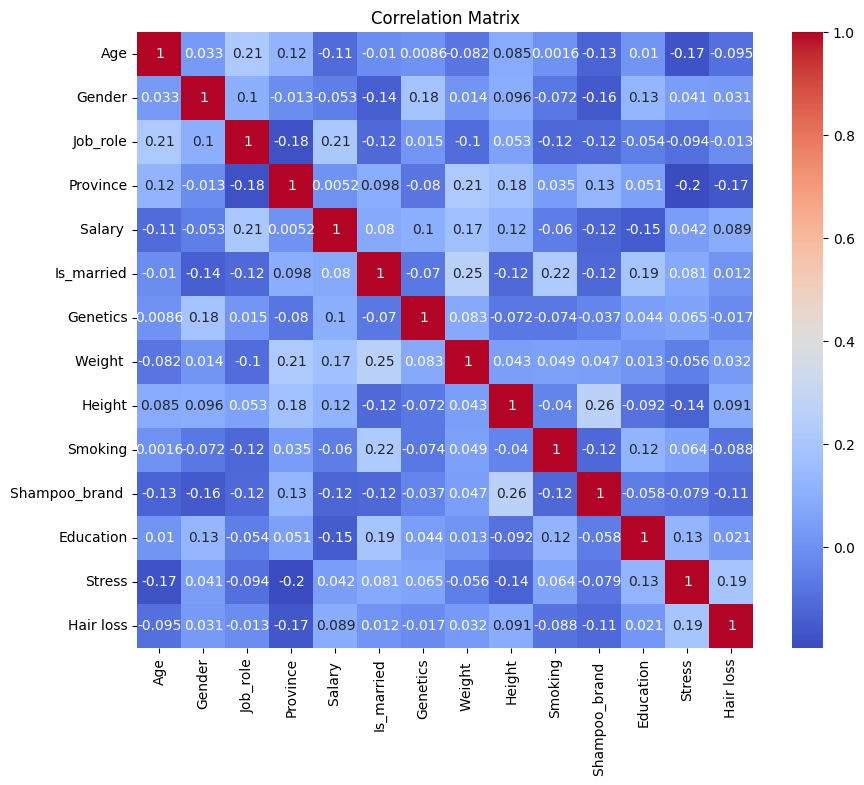

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 14)
df = pd.DataFrame(data, columns=['Age', 'Gender', 'Job_role', 'Province', 'Salary ','Is_married','Genetics','Weight ','Height','Smoking','Shampoo_brand ','Education','Stress','Hair loss'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Hair loss', ylabel='count'>

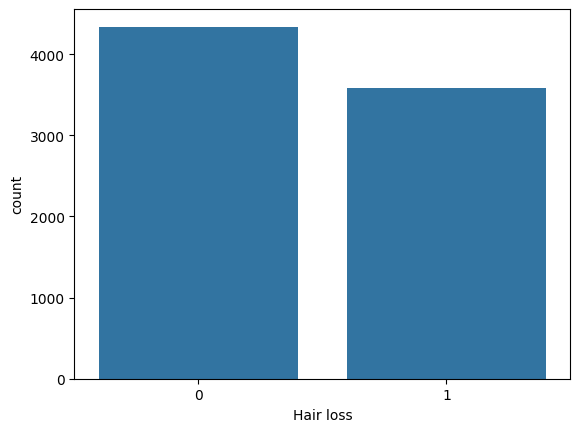

In [ ]:
sns.countplot(x="Hair loss", data=Dataset_2)

splitting

In [ ]:
X = Dataset_2[['Age','Genetics','Shampoo_brand','Province','Stress','Salary','Height','Smoking']]
Y = Dataset_2["Hair loss"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
target_size = 10000
current_size = X_train.shape[0]
augmentation_factor = target_size // current_size

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

numeric_data_list = []
categorical_data_list = []

for i in range(augmentation_factor):
    noise = np.random.normal(0, 0.01, X_train[numeric_cols].shape)
    X_numeric_augmented = X_train[numeric_cols] + noise
    numeric_data_list.append(X_numeric_augmented)

    X_categorical_augmented = X_train[categorical_cols]
    categorical_data_list.append(X_categorical_augmented)

X_numeric_combined = pd.concat(numeric_data_list, axis=0).reset_index(drop=True)
X_categorical_combined = pd.concat(categorical_data_list, axis=0).reset_index(drop=True)

X_train_combined = pd.concat([X_numeric_combined, X_categorical_combined], axis=1)
Y_train_combined = pd.concat([pd.Series(Y_train)] * augmentation_factor, axis=0).reset_index(drop=True)

n_remaining = target_size - len(X_train_combined)
if n_remaining > 0:
    X_remaining_numeric = X_train[numeric_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_categorical = X_train[categorical_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_combined = pd.concat([X_remaining_numeric, X_remaining_categorical], axis=1)

    X_train_combined = pd.concat([X_train_combined, X_remaining_combined], axis=0).reset_index(drop=True)
    Y_remaining = pd.Series(Y_train).sample(n_remaining, replace=True).reset_index(drop=True)
    Y_train_combined = pd.concat([Y_train_combined, Y_remaining], axis=0).reset_index(drop=True)

print(f"Original training set size: {current_size}")
print(f"Augmented training set size: {X_train_combined.shape[0]}")
print(f"Test set remains unchanged: {X_test.shape[0]}")

# Now train the model on X_train_combined, Y_train_combined

Original training set size: 5541
Augmented training set size: 10000
Test set remains unchanged: 2376


In [ ]:
from sklearn.utils import shuffle  # Import the shuffle function
target_size = 10000
current_size = X_train.shape[0]
augmentation_factor = target_size // current_size

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

numeric_data_list = []
categorical_data_list = []

# Original Augmentation Loop
for i in range(augmentation_factor):
    noise = np.random.normal(0, 0.01, X_train[numeric_cols].shape)
    X_numeric_augmented = X_train[numeric_cols] + noise
    numeric_data_list.append(X_numeric_augmented)

    X_categorical_augmented = X_train[categorical_cols]
    categorical_data_list.append(X_categorical_augmented)

X_numeric_combined = pd.concat(numeric_data_list, axis=0).reset_index(drop=True)
X_categorical_combined = pd.concat(categorical_data_list, axis=0).reset_index(drop=True)

X_train_combined = pd.concat([X_numeric_combined, X_categorical_combined], axis=1)
Y_train_combined = pd.concat([pd.Series(Y_train)] * augmentation_factor, axis=0).reset_index(drop=True)

n_remaining = target_size - len(X_train_combined)
if n_remaining > 0:
    X_remaining_numeric = X_train[numeric_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_categorical = X_train[categorical_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_combined = pd.concat([X_remaining_numeric, X_remaining_categorical], axis=1)

    X_train_combined = pd.concat([X_train_combined, X_remaining_combined], axis=0).reset_index(drop=True)
    Y_remaining = pd.Series(Y_train).sample(n_remaining, replace=True).reset_index(drop=True)
    Y_train_combined = pd.concat([Y_train_combined, Y_remaining], axis=0).reset_index(drop=True)

# ============= New Code for Balancing =============

# Count the classes
class_counts = Y_train_combined.value_counts()
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()

# Separate classes
X_minority = X_train_combined[Y_train_combined == min_class]
X_majority = X_train_combined[Y_train_combined == max_class]

Y_minority = Y_train_combined[Y_train_combined == min_class]
Y_majority = Y_train_combined[Y_train_combined == max_class]

# Calculate difference to balance
difference = len(Y_majority) - len(Y_minority)

# Augment minority class to balance
X_minority_augmented = X_minority.sample(difference, replace=True).reset_index(drop=True)
Y_minority_augmented = pd.Series([min_class] * difference)

# Combine balanced dataset
X_train_balanced = pd.concat([X_majority, X_minority, X_minority_augmented], axis=0).reset_index(drop=True)
Y_train_balanced = pd.concat([Y_majority, Y_minority, Y_minority_augmented], axis=0).reset_index(drop=True)

# Shuffle the combined dataset
X_train_balanced, Y_train_balanced = shuffle(X_train_balanced, Y_train_balanced, random_state=42)

print("Balanced Class Distribution:")
print(Y_train_balanced.value_counts())

# Now train the model on X_train_balanced, Y_train_balanced


Balanced Class Distribution:
0    5503
1    5503
Name: count, dtype: int64


<ipython-input-227-2dbf1bf70b2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='viridis')


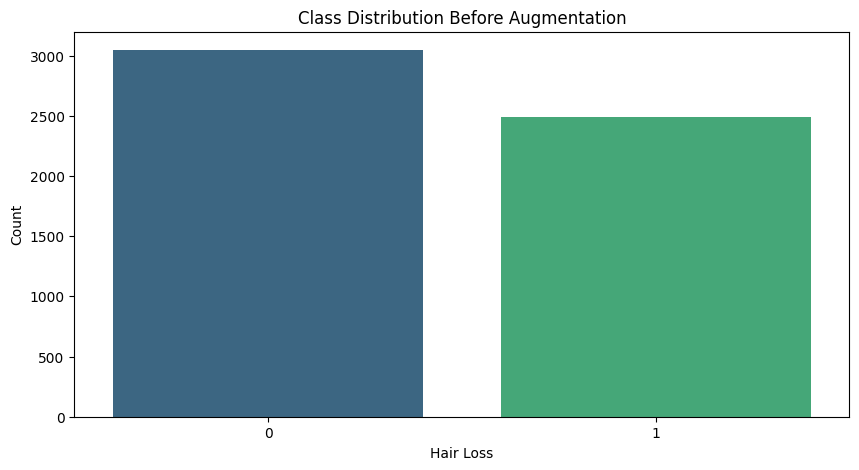

<ipython-input-227-2dbf1bf70b2b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train_balanced, palette='viridis')


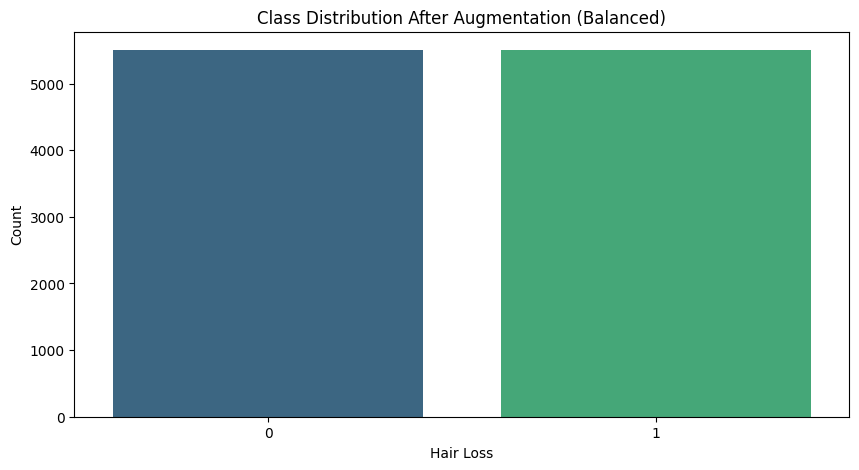

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Before Augmentation
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution Before Augmentation')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

# Plot After Augmentation (Balanced)
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train_balanced, palette='viridis')
plt.title('Class Distribution After Augmentation (Balanced)')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()


In [ ]:
print("Before Augmentation (Training):")
print(Y_train.value_counts(normalize=True) * 100)

print("\nAfter Augmentation (Training):")
print(Y_train_balanced.value_counts(normalize=True) * 100)

print("\nActual Test:")
print(Y_test.value_counts(normalize=True) * 100)


Before Augmentation (Training):
Hair loss
0    54.990074
1    45.009926
Name: proportion, dtype: float64

After Augmentation (Training):
0    50.0
1    50.0
Name: proportion, dtype: float64

Actual Test:
Hair loss
0    54.377104
1    45.622896
Name: proportion, dtype: float64


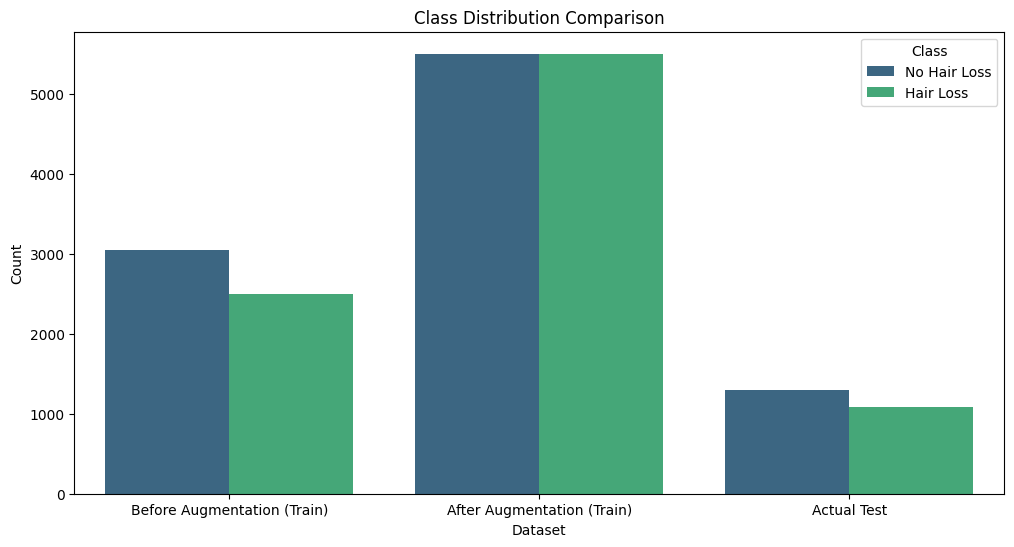

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Class': ['No Hair Loss', 'Hair Loss'],
    'Before Augmentation (Train)': Y_train.value_counts().values,
    'After Augmentation (Train)': Y_train_balanced.value_counts().values,
    'Actual Test': Y_test.value_counts().values
})

# Melt DataFrame for Seaborn compatibility
plot_data_melted = plot_data.melt(id_vars='Class', var_name='Dataset', value_name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data_melted, x='Dataset', y='Count', hue='Class', palette='viridis')
plt.title('Class Distribution Comparison')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()


scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)

Predictive models


In [ ]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, Y_train_balanced)  # Train the model

# Predictions on training data
X_train_prediction_log_reg = log_reg.predict(X_train_scaled)
train_accuracy_log_reg = accuracy_score(Y_train_balanced, X_train_prediction_log_reg)
print("Training data accuracy of Logistic Regression: ", train_accuracy_log_reg)

# Predictions on test data
X_test_prediction_log_reg = log_reg.predict(X_test_scaled)
test_accuracy_log_reg = accuracy_score(Y_test, X_test_prediction_log_reg)
print("Testing data accuracy of Logistic Regression: ", test_accuracy_log_reg)


Training data accuracy of Logistic Regression:  0.6379247683081956
Testing data accuracy of Logistic Regression:  0.7487373737373737


In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_nbayes=nbayes.predict(X_train_scaled)
train_accuracy_nbayes=accuracy_score(Y_train_balanced,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

X_test_prediction_nbayes=nbayes.predict(X_test_scaled)
test_accuracy_nbayes=accuracy_score(Y_test,X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ",test_accuracy_nbayes)


Training data accuracy of nbayes:  0.5911321097583137
Testing data accuracy of nbayes:  0.6603535353535354


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_knn=knn.predict(X_train_scaled)
train_accuracy_knn=accuracy_score(Y_train_balanced,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

X_test_prediction_knn=knn.predict(X_test_scaled)
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Training data accuracy of knn:  0.6612756678175541
Testing data accuracy of knn:  0.4810606060606061


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_dt_classifier=dt_classifier.predict(X_train_scaled)
train_accuracy_dt_classifier=accuracy_score(Y_train_balanced,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

X_test_prediction_dt_classifier=dt_classifier.predict(X_test_scaled)
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)

Training data accuracy of dt_classifier:  0.7991095765945848
Testing data accuracy of dt_classifier:  0.4734848484848485


In [ ]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train_balanced,X_train_prediction_random_forest)

print("Training data accuracy of random_forest: ",train_accuracy_random_forest)
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)

test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)

Training data accuracy of random_forest:  0.7991095765945848
Testing data accuracy of random_forest:  0.4574915824915825


In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train_balanced,X_train_prediction_xgb)

print("Training data accuracy of xgb: ",train_accuracy_xgb)
X_test_prediction_xgb=xgb.predict(X_test_scaled)

test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)


Training data accuracy of xgb:  0.781391968017445
Testing data accuracy of xgb:  0.4743265993265993


In [ ]:
svc = SVC()
svc.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_svc=svc.predict(X_train_scaled)
train_accuracy_svc=accuracy_score(Y_train_balanced,X_train_prediction_svc)
print("Training data accuracy of svc: ",train_accuracy_svc)

X_test_prediction_svc=svc.predict(X_test_scaled)
test_accuracy_svc=accuracy_score(Y_test,X_test_prediction_svc)
print("Testing data accuracy of svc: ",test_accuracy_svc)

Training data accuracy of svc:  0.6419225876794475
Testing data accuracy of svc:  0.75


In [ ]:
predictions_xgb = xgb.predict(X_test_scaled)
predictions_svc = X_test_prediction_svc=svc.predict(X_test_scaled)
predictions_log_reg = log_reg.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_nb = nbayes.predict(X_test_scaled)
predictions_dt = dt_classifier.predict(X_test_scaled)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier = Xgb.XGBClassifier()  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.7554713804713805


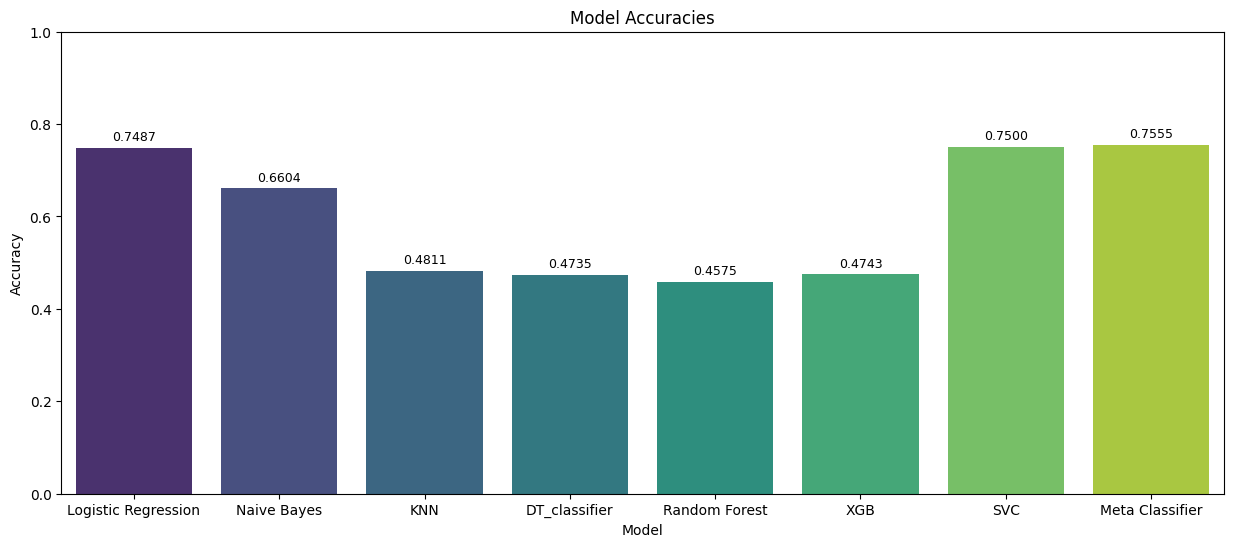

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

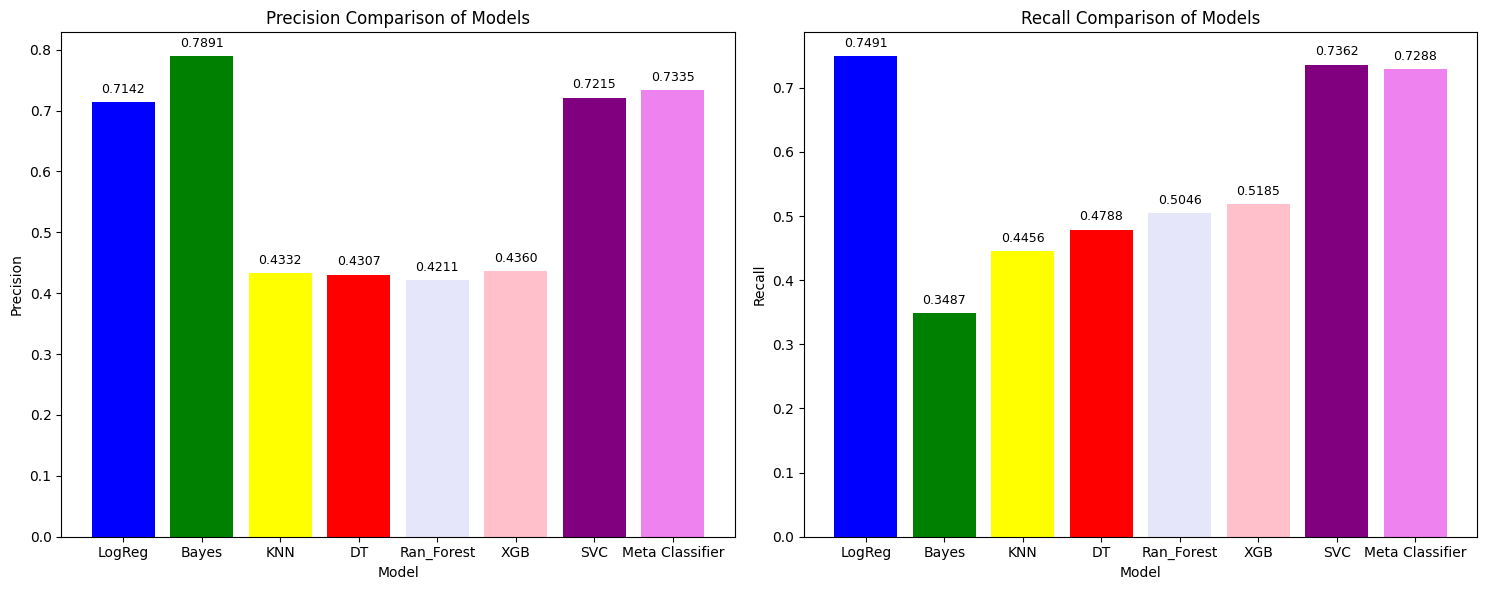

In [ ]:
# Calculate precision and recall for each model
precisions = [precision_score(Y_test,X_test_prediction_log_reg), precision_score(Y_test, X_test_prediction_nbayes),  precision_score(Y_test, X_test_prediction_knn),precision_score(Y_test, X_test_prediction_dt_classifier),precision_score(Y_test,X_test_prediction_random_forest),precision_score(Y_test,X_test_prediction_xgb),precision_score(Y_test,X_test_prediction_svc),precision_score(target, y_pred_meta)]
recalls = [recall_score(Y_test, X_test_prediction_log_reg), recall_score(Y_test, X_test_prediction_nbayes),  recall_score(Y_test, X_test_prediction_knn),recall_score(Y_test, X_test_prediction_dt_classifier),recall_score(Y_test,X_test_prediction_random_forest),recall_score(Y_test,X_test_prediction_xgb),recall_score(Y_test,X_test_prediction_svc),recall_score(target, y_pred_meta)]

# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate F1-score for each model
f1_scores = [f1_score(Y_test, X_test_prediction_log_reg),
             f1_score(Y_test, X_test_prediction_nbayes),
             f1_score(Y_test, X_test_prediction_knn),
             f1_score(Y_test, X_test_prediction_dt_classifier),
             f1_score(Y_test, X_test_prediction_random_forest),
             f1_score(Y_test,X_test_prediction_xgb),
             f1_score(Y_test,X_test_prediction_svc),
             f1_score(Y_test,y_pred_meta),]


# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")

LogReg: F1-score = 0.7312
Bayes: F1-score = 0.4837
KNN: F1-score = 0.4393
DT: F1-score = 0.4535
Ran_Forest: F1-score = 0.4591
XGB: F1-score = 0.4737
SVC: F1-score = 0.7288
Meta Classifier: F1-score = 0.7311


<ipython-input-242-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


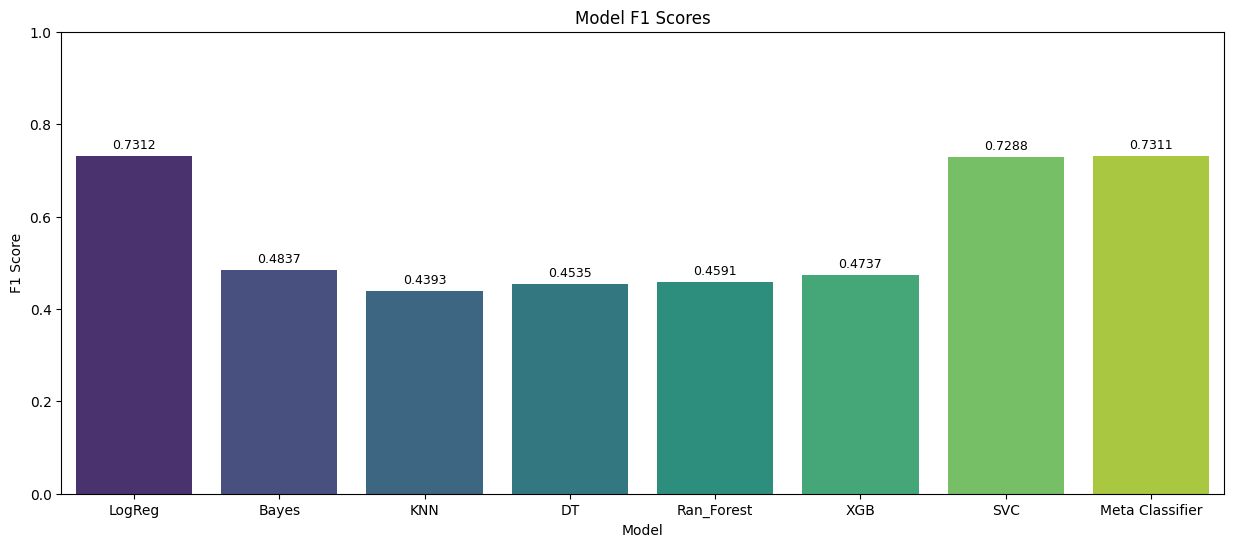

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

lime

In [ ]:

# # Load your actual dataset (replace with your actual dataset file)
# #data = pd.read_csv('/content/mdataset2-Dataset2.csv')
# X = Dataset_2.drop('Hair loss', axis=1)  # Exclude the target column
# Y = Dataset_2['Hair loss']

# label_encoder = LabelEncoder()
# for col in X.select_dtypes(include=['object']).columns:
#     X[col] = label_encoder.fit_transform(X[col])

# # Train your model (assuming you have already trained it)
# model = meta_classifier  # Replace with your actual model
# model.fit(X, Y)

# # Check the shapes of the data
# print("Shape of X:", X.shape)

# # Select an instance for explanation (replace with your actual instance)
# instance = X.iloc[0].values.reshape(1, -1)
# print("Shape of instance:", instance.shape)

# # Initialize SHAP explainer
# explainer = shap.TreeExplainer(model)

# # Generate SHAP values for the selected instance
# shap_values = explainer.shap_values(X)

# # Visualize the SHAP values
# #shap.initjs()
# #shap.force_plot(explainer.expected_value, shap_values, instance)

# # For a more comprehensive analysis, you can also visualize feature importance across the entire dataset
# shap.summary_plot(shap_values, X)


In [ ]:
X = Dataset_2.drop('Hair loss', axis=1)  # Exclude the target column
Y = Dataset_2['Hair loss']

label_encoder = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])
# Train your model (assuming you have already trained it)
model = meta_classifier# Replace with your actual model
model.fit(X, Y)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=['No Hair fall', 'Hair Fall'],  # Replace with your actual class names
    mode='classification'  # Change to 'regression' if your task is regression
)

# Select an instance for explanation (replace with your actual instance)
instance = X.iloc[0]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance.values,
    predict_fn=model.predict_proba  # Use predict if your task is regression
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True)

# threshold = 0.1  # Ignore LIME weights below this
# important_features_lime = [
#     (feature, weight) for feature, weight in explanation.as_list() if abs(weight) > threshold
# ]
# print("Selected Features (LIME):", important_features_lime)

In [ ]:
# import numpy as np
# import pandas as pd
# from lime.lime_tabular import LimeTabularExplainer

# # Load your actual dataset (replace with your actual dataset file)
# # data = pd.read_csv('/content/Dataset_1.csv')
# X = Dataset_2.drop('Hair loss', axis=1)  # Exclude the target column
# Y = Dataset_2['Hair loss']

# # Train your model (assuming you have already trained it)
# model = meta_classifier  # Replace with your actual model
# model.fit(X, Y)

# # Initialize LIME explainer
# explainer = LimeTabularExplainer(
#     training_data=X.values,
#     feature_names=X.columns,
#     class_names=['No Hair fall', 'Hair Fall'],  # Replace with your actual class names
#     mode='classification'  # Change to 'regression' if your task is regression
# )

# # Select an instance for explanation (replace with your actual instance)
# instance = X.iloc[0]

# # Generate explanation for the selected instance
# explanation = explainer.explain_instance(
#     data_row=instance.values,
#     predict_fn=model.predict_proba  # Use predict if your task is regression
# )

# # Visualize the explanation
# explanation.show_in_notebook(show_table=True)

Shape of X: (7917, 13)
Shape of instance: (1, 13)


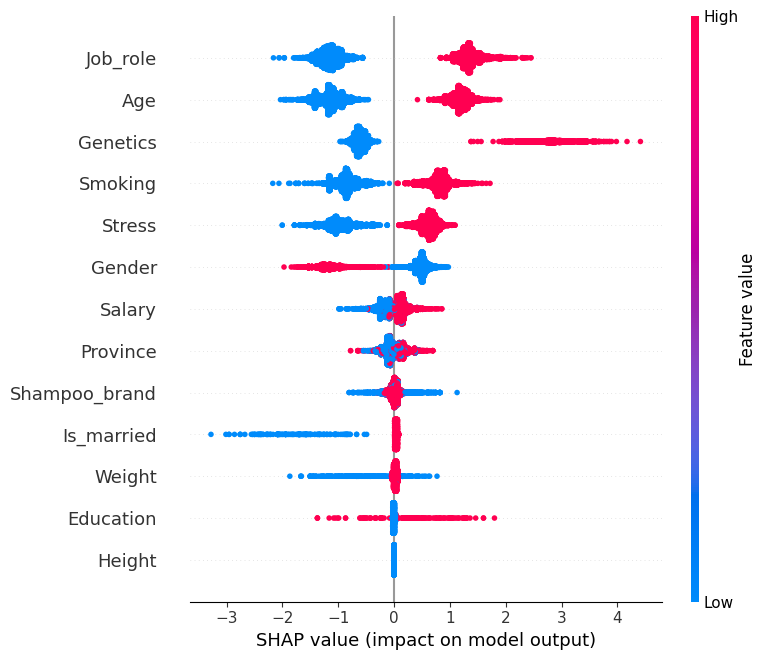

In [ ]:
# Load your actual dataset (replace with your actual dataset file)
#data = pd.read_csv('/content/Dataset_1.csv')
X = Dataset_2.drop('Hair loss', axis=1)  # Exclude the target column
Y = Dataset_2['Hair loss']


# Train your model (assuming you have already trained it)
model = meta_classifier  # Replace with your actual model
model.fit(X, Y)

# Check the shapes of the data
print("Shape of X:", X.shape)

# Select an instance for explanation (replace with your actual instance)
instance = X.iloc[0].values.reshape(1, -1)
print("Shape of instance:", instance.shape)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the selected instance
shap_values = explainer.shap_values(X)

# Visualize the SHAP values
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, instance)

# For a more comprehensive analysis, you can also visualize feature importance across the entire dataset
shap.summary_plot(shap_values, X)

confusion matrix


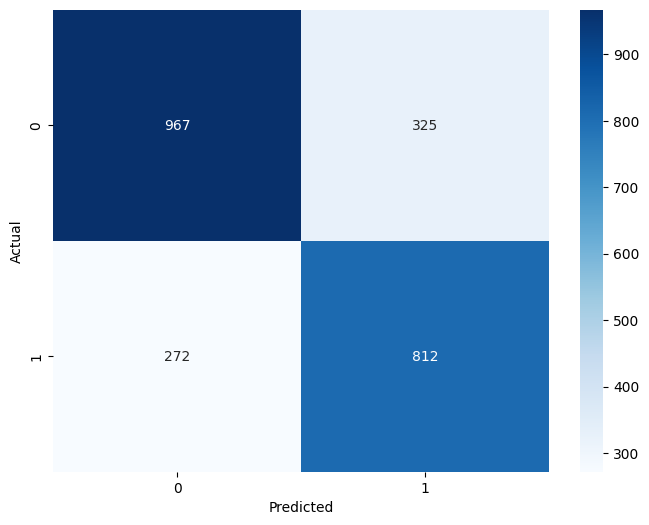

In [ ]:
cm_lr = confusion_matrix(Y_test, X_test_prediction_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


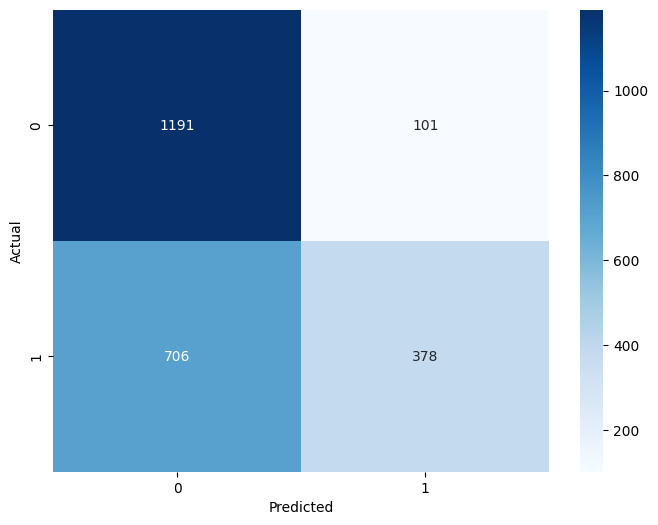

In [ ]:
cm_nb = confusion_matrix(Y_test,X_test_prediction_nbayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

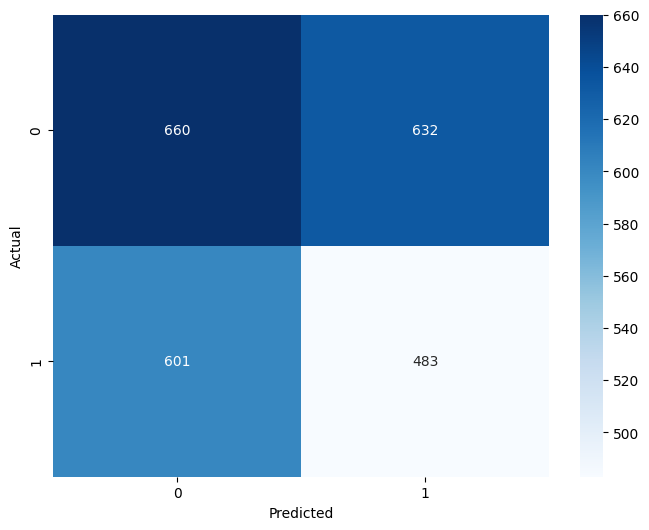

In [ ]:
cm_knn = confusion_matrix(Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

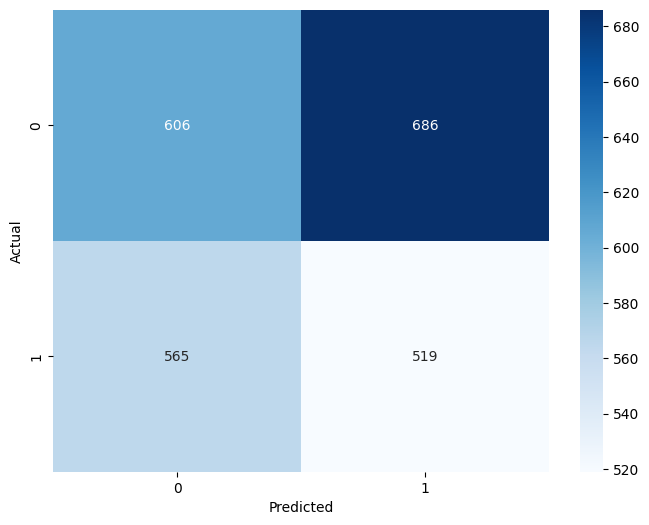

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_classifier, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

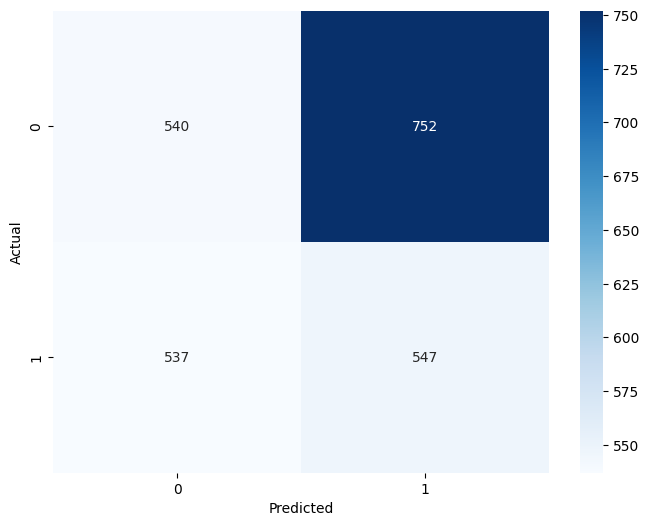

In [ ]:
cm_random = confusion_matrix(Y_test,X_test_prediction_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random , annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



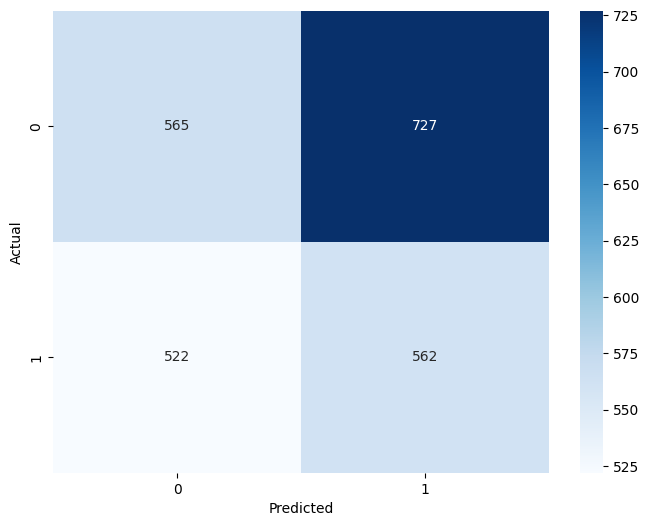

In [ ]:
cm_xgb = confusion_matrix(Y_test,X_test_prediction_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

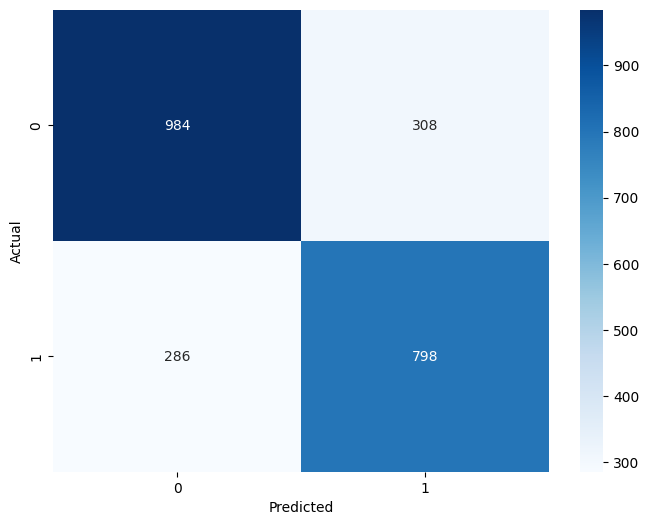

In [ ]:
cm_svc = confusion_matrix(Y_test,X_test_prediction_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

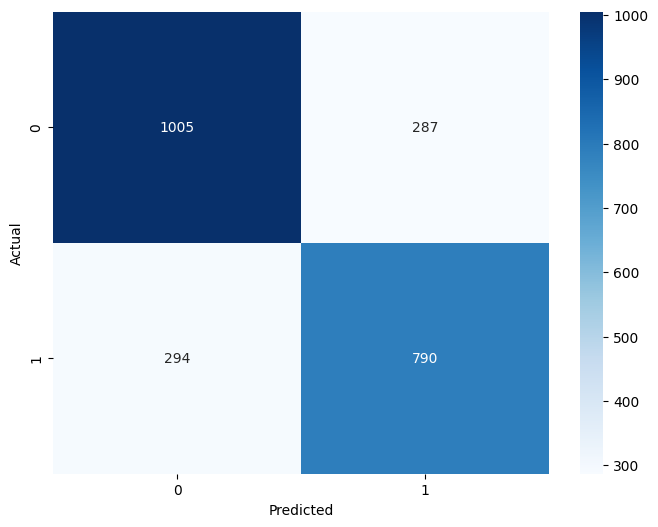

In [ ]:
cm_meta = confusion_matrix(target, y_pred_meta)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Meta Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Roc**

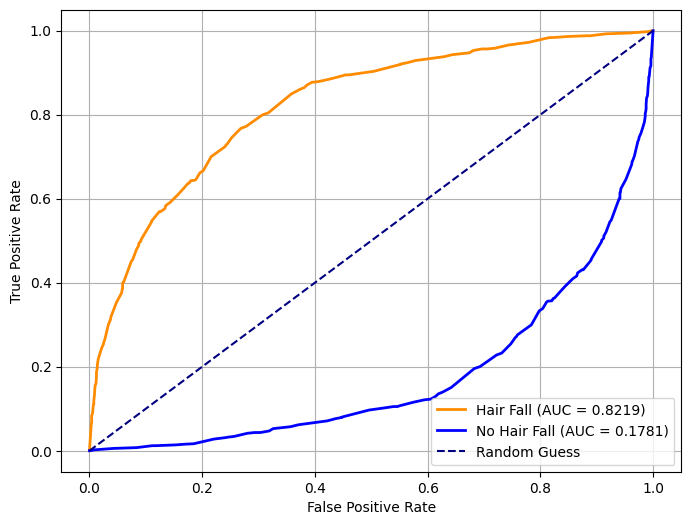

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


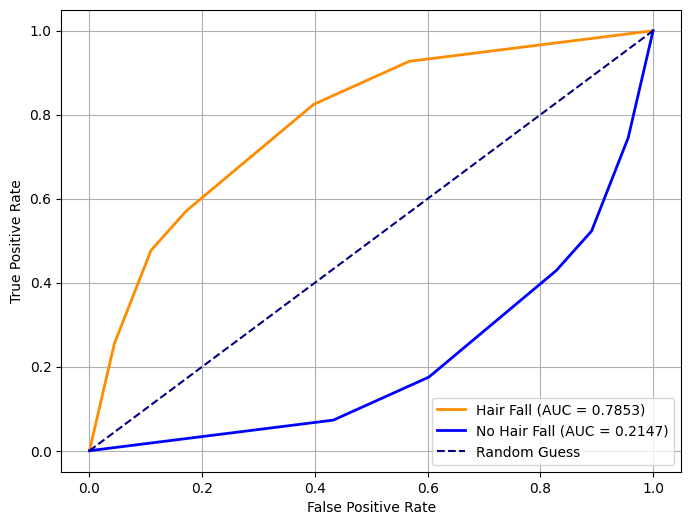

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


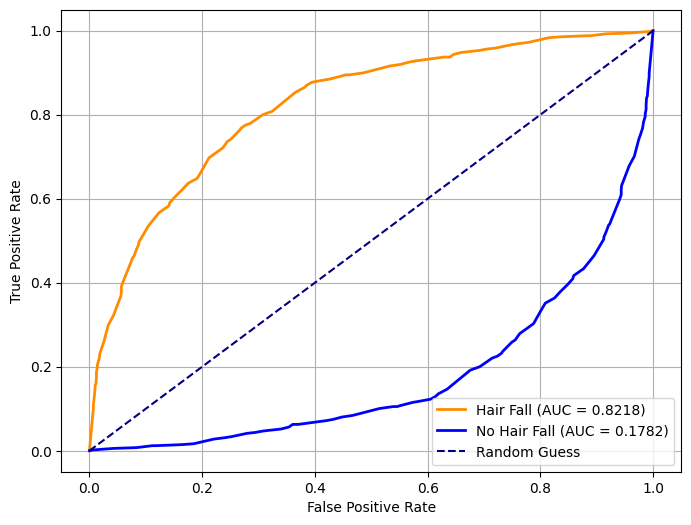

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


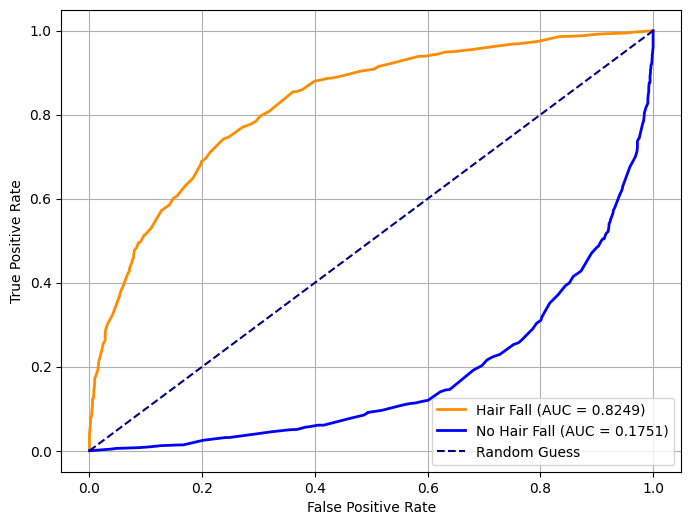

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =LogisticRegression()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


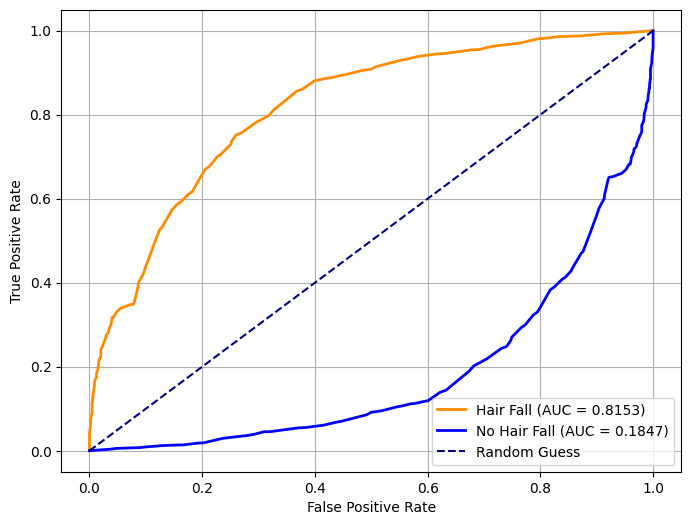

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =GaussianNB()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


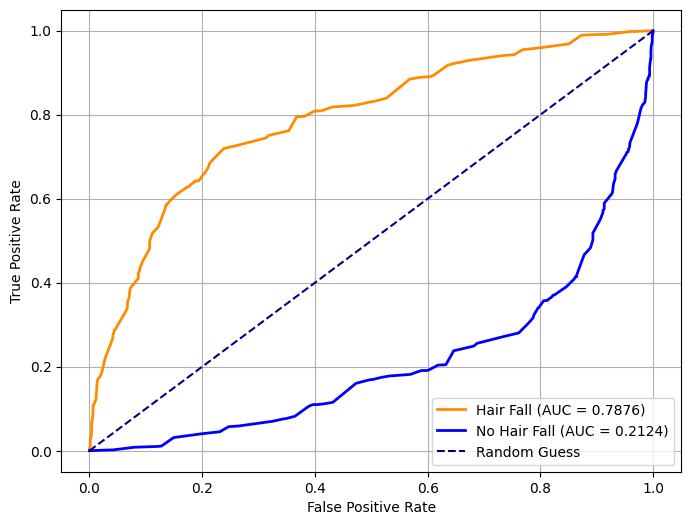

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = SVC(probability=True)
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


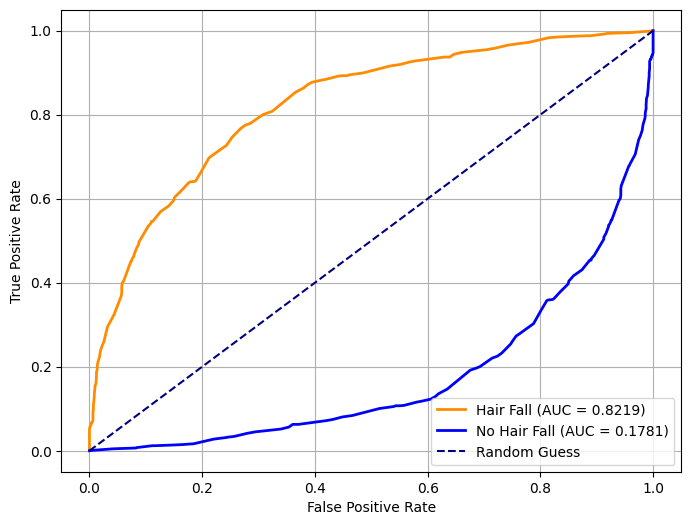

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =Xgb.XGBClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


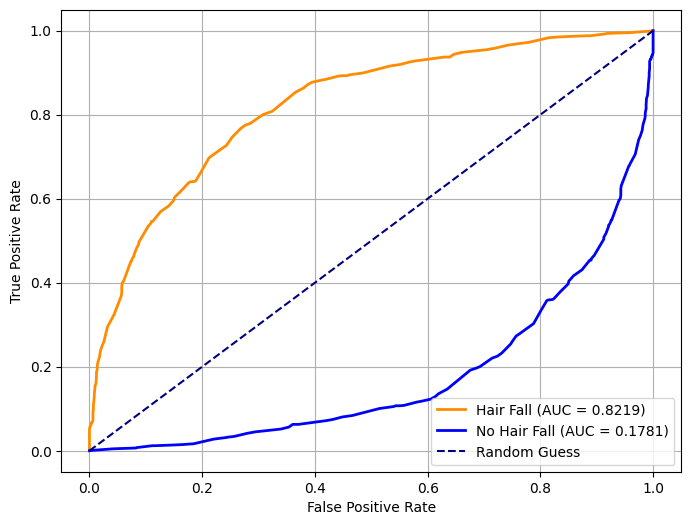

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =meta_classifier
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **stress, smoking, salary, province**

In [ ]:
Dataset_2.rename(columns={"Hair loss": "Hair Loss"}, inplace=True)

In [ ]:
Dataset_2.head()

,Age,Gender,Job_role,Province,Salary,Is_married,Genetics,Weight,Height,Shampoo_brand,Smoking,Education,Stress,Hair Loss
0,0,1,1,0,1,1,0,1,0,1,1,0,1,1
1,1,1,1,0,1,1,0,1,0,1,0,0,1,0
2,0,1,0,0,0,1,0,1,0,1,0,0,0,0
3,0,1,1,0,0,1,0,1,0,0,1,0,1,1
4,0,0,0,1,0,1,0,1,0,1,1,0,0,0


In [ ]:
# csv_file_path = 'new_dataset_2.csv'
# Dataset_2.to_csv(csv_file_path, index=False)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # Load the datasets
# dataset_1 = pd.read_csv('/content/Dataset_1_encoded.csv')  # Assuming this is your original Dataset 1
# #dataset_2 = pd.read_csv('/content/mdataset2-Dataset2.csv')  # Assuming this is Dataset 2

# # Define feature mapping between Dataset 1 and Dataset 2
# feature_mapping = {
#     "Stress": "Stress",
#     "Age": "Age",
#     "Genetics": "Genetics",
#     "Hair Loss": "Hair Loss",  # Assuming 'Hair Loss' is the target in both datasets
#     "Smoking": "Smoking",

# }

# # Align features for Dataset 1 & Dataset 2
# mapped_features = [key for key in feature_mapping if key in dataset_1.columns]
# X_dataset_1 = Dataset_2[mapped_features]
# y_dataset_1 = Dataset_2[['Salary', 'Province']]  # Assuming these are the columns to impute in Dataset 2

# # 1. Split Dataset 1 into train and test sets
# X_train_dataset_1, X_test_dataset_1, y_train_dataset_1, y_test_dataset_1 = train_test_split(
#     X_dataset_1, y_dataset_1, test_size=0.3, random_state=42
# )

# # 2. Train the first model (RandomForestClassifier) using training data from Dataset 1
# classifier = RandomForestClassifier(random_state=42)
# classifier.fit(X_train_dataset_1, (y_train_dataset_1 > 0).astype(int))  # Assuming binary target

# # 3. Train the second model (KNeighborsClassifier) using training data from Dataset 1
# imputation_model_test = KNeighborsClassifier(n_neighbors=5)
# imputation_model_test.fit(X_train_dataset_1, (y_train_dataset_1 > 0).astype(int))  # Assuming binary target

# # 4. Align features for Dataset 2
# X_dataset_2 = dataset_1[mapped_features]
# y_dataset_2 = X_dataset_2[['Stress', 'Age', 'Genetics', 'Hair Loss', 'Smoking']] # Assuming these are the target columns in dataset_1 as well

# # 5. Split Dataset 2 using the same random state for consistency
# X_train_dataset_2, X_test_dataset_2, y_train_dataset_2, y_test_dataset_2 = train_test_split(
#     X_dataset_2, y_dataset_2,
#     test_size=0.3, random_state=42
# )

# # 6. Impute values for the training data in dataset_2 using the first model
# dataset_2_train = dataset_1.loc[X_train_dataset_2.index]
# dataset_2_train.loc[:, ['Salary', 'Province']] = classifier.predict(X_train_dataset_2)  # Assuming binary target

# # 7. Impute values for the test data in dataset_2 using the second model (KNN)
# dataset_2_test = dataset_1.loc[X_test_dataset_2.index]
# imputed_test_values = imputation_model_test.predict(X_test_dataset_2)  # Assuming binary target
# dataset_2_test.loc[:, ['Salary', 'Province']] = imputed_test_values

# # 8. Concatenate and save:
# final_dataset_1 = pd.concat([dataset_2_train, dataset_2_test], ignore_index=True)
# final_dataset_1.to_csv('/content/Dataset_1_encoded.csv', index=False)  # Save to a new file

# print("Imputation completed for Dataset 2.")

In [ ]:
# mse_values = {}
# columns = ['Salary', 'Province']  # Define columns for clarity
# num_test_samples = len(y_test_dataset_1) # Get number of test samples

# for column in columns:
#     y_test_actual = y_test_dataset_1[column].values
#     # Select the last 'num_test_samples' rows from final_dataset_1 for comparison
#     y_test_imputed = final_dataset_1[column].values[-num_test_samples:]
#     # Check if lengths are still inconsistent and handle if necessary
#     if len(y_test_actual) != len(y_test_imputed):
#         min_len = min(len(y_test_actual), len(y_test_imputed))
#         y_test_actual = y_test_actual[:min_len]
#         y_test_imputed = y_test_imputed[:min_len]
#         print(f"Warning: Inconsistent lengths for '{column}'. Truncating to {min_len} samples.")
#     mse_values[column] = mean_squared_error(y_test_actual, y_test_imputed)  # Calculate MSE
#     print(f"Mean Squared Error for '{column}': {mse_values[column]:.4f}")

# # Create a list of MSE values from the dictionary
# mse_values_list = list(mse_values.values())

# # Create Bar Plot
# bar_width = 0.35
# index = np.arange(len(columns))

# plt.figure(figsize=(10, 6))
# plt.bar(index, mse_values_list, bar_width, label='Imputed MSE', color='skyblue') # Use the created list here

# plt.xlabel('Imputed Features')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.xticks(index, columns)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
dataset_1 = pd.read_csv('/content/Imputed dataset 3 from dataset 1.csv')  # Assuming this is your original Dataset 1
#dataset_2 = pd.read_csv('/content/mdataset2-Dataset2.csv')  # Assuming this is Dataset 2

# Define feature mapping between Dataset 1 and Dataset 2
feature_mapping = {
    "Stress": "Stress",
    "Genetics": "Genetics",
    "Hair Loss": "Hair Loss",  # Assuming 'Hair Loss' is the target in both datasets
    "Job_role": "Job_role",
    "Shampoo_brand": "Shampoo_brand",

}

# Align features for Dataset 1 & Dataset 2
mapped_features = [key for key in feature_mapping if key in dataset_1.columns]
X_dataset_1 = Dataset_2[mapped_features]
y_dataset_1 = Dataset_2[['Smoking','Salary', 'Province']]  # Assuming these are the columns to impute in Dataset 2

# 1. Split Dataset 1 into train and test sets
X_train_dataset_1, X_test_dataset_1, y_train_dataset_1, y_test_dataset_1 = train_test_split(
    X_dataset_1, y_dataset_1, test_size=0.3, random_state=42
)

# 2. Train the first model (RandomForestClassifier) using training data from Dataset 1
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_dataset_1, (y_train_dataset_1 > 0).astype(int))  # Assuming binary target

# 3. Train the second model (KNeighborsClassifier) using training data from Dataset 1
imputation_model_test = KNeighborsClassifier(n_neighbors=5)
imputation_model_test.fit(X_train_dataset_1, (y_train_dataset_1 > 0).astype(int))  # Assuming binary target

# 4. Align features for Dataset 2
X_dataset_2 = dataset_1[mapped_features]
y_dataset_2 = X_dataset_2[['Stress','Genetics', 'Job_role','Shampoo_brand','Hair Loss']] # Assuming these are the target columns in dataset_1 as well

# 5. Split Dataset 2 using the same random state for consistency
X_train_dataset_2, X_test_dataset_2, y_train_dataset_2, y_test_dataset_2 = train_test_split(
    X_dataset_2, y_dataset_2,
    test_size=0.3, random_state=42
)

# 6. Impute values for the training data in dataset_2 using the first model
dataset_2_train = dataset_1.loc[X_train_dataset_2.index]
dataset_2_train.loc[:, ['Smoking','Salary', 'Province']] = classifier.predict(X_train_dataset_2)  # Assuming binary target

# 7. Impute values for the test data in dataset_2 using the second model (KNN)
dataset_2_test = dataset_1.loc[X_test_dataset_2.index]
imputed_test_values = imputation_model_test.predict(X_test_dataset_2)  # Assuming binary target
dataset_2_test.loc[:, ['Smoking','Salary', 'Province']] = imputed_test_values

# 8. Concatenate and save:
final_dataset_1 = pd.concat([dataset_2_train, dataset_2_test], ignore_index=True)
final_dataset_1.to_csv('/content/Imputed dataset 3 from dataset 1.csv', index=False)  # Save to a new file

print("Imputation completed for Dataset 2.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Imputed dataset 3 from dataset 1.csv'

In [ ]:
mse_values = {}
columns = ['Smoking','Salary', 'Province']  # Define columns for clarity
num_test_samples = len(y_test_dataset_1) # Get number of test samples

for column in columns:
    y_test_actual = y_test_dataset_1[column].values
    # Select the last 'num_test_samples' rows from final_dataset_1 for comparison
    y_test_imputed = final_dataset_1[column].values[-num_test_samples:]
    # Check if lengths are still inconsistent and handle if necessary
    if len(y_test_actual) != len(y_test_imputed):
        min_len = min(len(y_test_actual), len(y_test_imputed))
        y_test_actual = y_test_actual[:min_len]
        y_test_imputed = y_test_imputed[:min_len]
        print(f"Warning: Inconsistent lengths for '{column}'. Truncating to {min_len} samples.")
    mse_values[column] = mean_squared_error(y_test_actual, y_test_imputed)  # Calculate MSE
    print(f"Mean Squared Error for '{column}': {mse_values[column]:.4f}")

# Create a list of MSE values from the dictionary
mse_values_list = list(mse_values.values())

# Create Bar Plot
bar_width = 0.35
index = np.arange(len(columns))

plt.figure(figsize=(10, 6))
plt.bar(index, mse_values_list, bar_width, label='Imputed MSE', color='skyblue') # Use the created list here

plt.xlabel('Imputed Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(index, columns)
plt.legend()
plt.tight_layout()
plt.show()